<a href="https://colab.research.google.com/github/ch23s020/Assignment1/blob/main/Copy_of_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import random
import pandas as pd

1.prepare data for n-dimensional input
2. passing this data to a sigmoid function---funct1
3. passing the ouyput of sigmoid into a softmax function to get the probability distri output---funct2
4. this will be y_hat
5. compare this y_hat with y-original(one hot vector)
6. for comaparison use of cross entropy(negative log-likelihood function)
7. calculate loss

Back Prop:-
1. calculate derivative of loss wrt y-hat
2. derivative of y-hat wrt funct2 (detailing of weight and preactivation at each layer use sirs slide)
3.funct2 wrt funct1
4. funct1 wrt to input weights

update:
1. use of gradient descent algo to update the w using the calculated dw(dl/dw)
2. pass the new w into forward prop again.

repeat:
1.repeat the same process for all data points (53999) for training purpose.

2.validate over validation data (54000 60000)

Set Up Wandb.

modification:-

1.Once done use other algorith for adam namdam sgd into main algorithm.
2. repaeat all procedure of running forward and back with added algo.

Finally push to wandb and see for correlation graph and other mentioned stuff in assignment.




4422102/4422102 [==============================] - 0s 0us/step


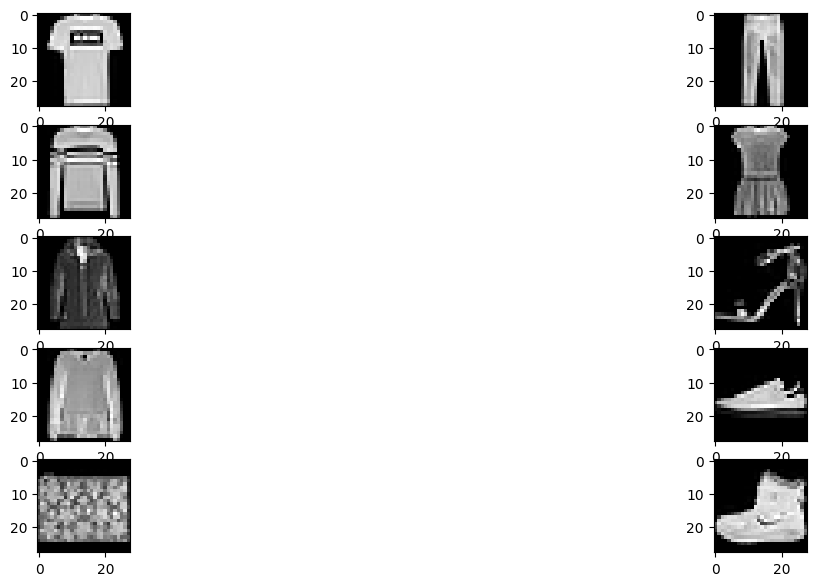

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data() # This data have 70k images of 28*28 in training set and 10k in test set(10% to keep aside)

fig, axs = plt.subplots (5,2, figsize=(16,7))

for i in range (5):
  for j in range (2):
    k = i*2 + j
    axs[i,j].imshow(x_train[y_train==k][0],cmap = 'gray')



#for i in range(10):
    #plt.subplot(5,2,i+1)
    #plt.imshow(x_train[i].reshape(28,28), cmap='gray')




In [ ]:
#initital data for 1 batch of 10 image

x_train_batch = np.array(x_train)
n_sample_b, pixh_b, pixw_b = x_train.shape
x_rshp_train_b = x_train.reshape(n_sample_b, pixh_b*pixw_b)

#input vectors
train_data_b = x_rshp_train_b
y_input_train_b = train_data_b[0]
x_input_train_b = train_data_b[1:11].T



In [ ]:
#setting 10% training data aside and using rest of the data from original x_train and y_train
x_train = np.array(x_train)
np.random.shuffle(x_train)
n_sample, pixh, pixw = x_train.shape
x_rshp_train = x_train.reshape(n_sample, pixh*pixw)

#input vectors training
train_data = x_rshp_train.astype('float64')/255.0
y_input_train = train_data[0]
x_input_train = train_data[1:54001]



#validation data
val_data = x_train[54001:60000]
np.random.shuffle(val_data)
n_sample_v, pixh_v, pixw_v = val_data.shape
x_rshp_val = val_data.reshape(n_sample_v, pixh_v*pixw_v)

validation_data = x_rshp_val.astype('float64')/255.0
x_input_valid = validation_data[54000:60000]
y_input_valid = validation_data[0]


#one hot encoding for true value (reference taken from article on encoding one_hot using keras)
y_train = to_categorical(y_train)


#Other way tried is :
  #one_hot_y = np.zeros((y.size, y.max()+1))
  #one_hot_y[np.arange(y.size,y)] = 1
#but this is giving more complexity hence using the article one for in algorithm

#Test Data
#use the same above things
#y_test = to_categorical(y_test)




In [ ]:
class meta_neuron():
  def__init__(self, epochs=10, hidden_size=4, activation="sigmoid", loss="cross_entropy", learning_rate=0.1, input, beta=0.5, beta1=0.5, beta2=0.5, epsilon=0.000001, num_layers=1, optimizer="sgd", weight, bias):
    self.epochs = epochs
    self.hidden_size = hidden_size
    self.activation = activation
    self.loss = loss
    self.learning_rate = learning_rate
    self.input = input
    self.beta = beta
    self.beta1 = beta1
    self.beta2 = beta2
    self.epsilon = epsilon
    self.num_layer = num_layer
    self.optimizer =  optimizer
    self.weight = weight
    self.bias = bias

  def input_layer_fn(self):
    output = np.dot(self.weight*self.input)
    output = output + self.bias
    output  = sigmoid(output)
    return output



  def hidden_layer_fn(self, input,id):
    output = np.dot(self.weight*self.input)
    output = output + self.bias
    if id == num_layer - 1:
      output  = softmax(output) #for output layer funcationality
    else:
      output  = sigmoid(output) #for normal hidden layers
    return output



In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

def categorical_crossentropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10)) / len(y_true)

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


def categorical_crossentropy_derivative(y_true, y_pred):
    return -(y_true / (y_pred + 1e-10)) / len(y_true)


In [ ]:
# Initialize weights and biases
input_size = 28 * 28
hidden_size = 128
output_size = num_classes

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Define batch size and number of epochs
batch_size = 64
epochs = 10

In [ ]:
# X_train_check = x_train[:5000]
# X_train_check = X_train_check.reshape(X_train_check.shape[0], -1) / 255.0
# X_train_check.shape
# x_input_train.shape
# y_train.shape
# X_train_check.size










3920000

In [ ]:
# defining parameters for initialization

# w = random.rand(784,10)
# b = random.rand(1,10)
# eta = 0.1
# epoch = 1000

# def grad_b(x,w,b,y):
#   fx = sigmoid(x,w,b)
#   return (fx-y)*fx*(1-fx)

# def grad_w(x,w,b,y):
#   fx = sigmoid(x,w,b)
#   return (fx-y)*fx*(1-fx)*x

# def gradient_descent():
#   for i in range (epoch):
#     dw=0;db=0
    # for x,y in zip(x_input_train_b, y_input_train_b):
    #   dw = dw + grad_w(x,w,b,y)
    #   db = db + grad_w(x,w,b,y)
    #   w = w - eta*dw
    #   b = b- eta *db



(10, 784)